# Problem Statment

the problem statment of this dataset is predicting the customer is fraud or not for providing the credit to the customer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Application Dataset

In [2]:
df_a= pd.read_csv('/content/drive/MyDrive/Credit Fraud/application_data.csv')


In [3]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_a.shape

(307511, 122)

In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df_a.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
#dropping the columns that store the Normalized information about building where the client lives
MODE_cols = [col for col in df_a.columns if '_MODE' in col]
df_a.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in df_a.columns if '_MEDI' in col]
df_a.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in df_a.columns if '_AVG' in col]
df_a.drop(columns = AVG_cols,inplace=True)

In [8]:
df_a.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_3

In [9]:
df_a1=df_a.filter(regex='^FLAG_DOCUMENT',axis=1)

In [10]:
df_a.drop(columns=df_a1.columns,inplace=True)

In [11]:
df_a1

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


# dropping columns which are not useful for analysis

In [13]:
df_a.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL'],inplace=True)

In [14]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_a.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR

In [16]:
df_a=df_a.drop(['OWN_CAR_AGE'], axis=1)

In [17]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


#EXT_SOURCE_1 is not dropped as we might need it for analysis

#dropping columns which are not useful for analysis

In [18]:
df_a.drop(columns = ['AMT_REQ_CREDIT_BUREAU_YEAR',
                             'AMT_REQ_CREDIT_BUREAU_MON',
                             'AMT_REQ_CREDIT_BUREAU_WEEK',
                             'AMT_REQ_CREDIT_BUREAU_DAY',
                             'AMT_REQ_CREDIT_BUREAU_HOUR'],inplace=True)

In [19]:
df_a.drop(columns = ['REG_REGION_NOT_LIVE_REGION',
                             'REG_REGION_NOT_WORK_REGION',
                             'LIVE_REGION_NOT_WORK_REGION',
                             'REG_CITY_NOT_LIVE_CITY',
                             'REG_CITY_NOT_WORK_CITY',
                            'LIVE_CITY_NOT_WORK_CITY'],inplace=True)

In [20]:
df_a.shape

(307511, 37)

In [21]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Business Entity Type 1,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0


# negative values are changed

In [22]:
df_a['DAYS_BIRTH'] = abs(df_a['DAYS_BIRTH'])
df_a['DAYS_ID_PUBLISH'] = abs(df_a['DAYS_ID_PUBLISH'])
df_a['DAYS_EMPLOYED'] = abs(df_a['DAYS_EMPLOYED'])
df_a['DAYS_REGISTRATION'] = abs(df_a['DAYS_REGISTRATION'])

In [23]:
df_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Business Entity Type 1,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0


In [24]:
# Get the count,size and unique values in each column of application data
df_a.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,134133,306851,246546,306490,306490,306490,306490,307510,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,58,114584,119831,814,33,10,33,9,3773,11


In [25]:
defaulters=df_a[df_a.TARGET==1]
nondefaulters=df_a[df_a.TARGET==0]

In [26]:
#checking percentage of defaulters
percentage_defaulters=(len(defaulters)*100)/len(df_a)
percentage_defaulters

8.072881945686495

In [27]:
#checking percentage of non-defaulters
percentage_nondefaulters=(len(nondefaulters)*100)/len(df_a)
percentage_nondefaulters

91.92711805431351

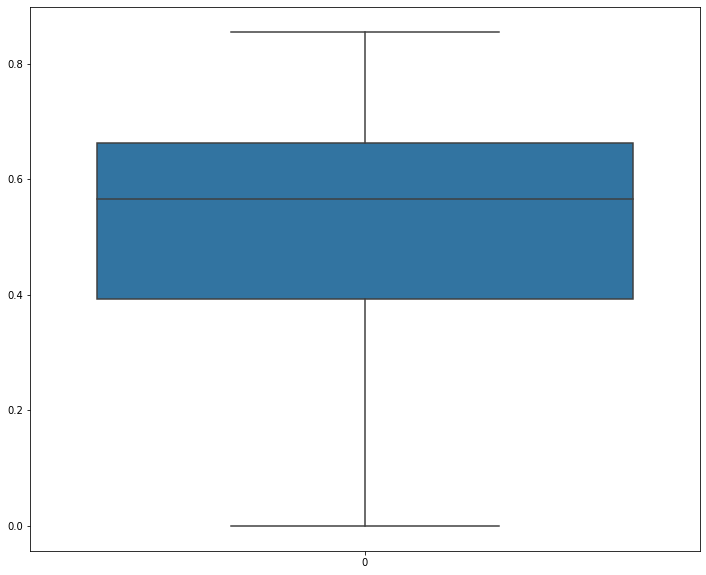

In [28]:
# Box plot for continuious variable
plt.figure(figsize=(12,10))
sns.boxplot(df_a['EXT_SOURCE_2'])
plt.show()

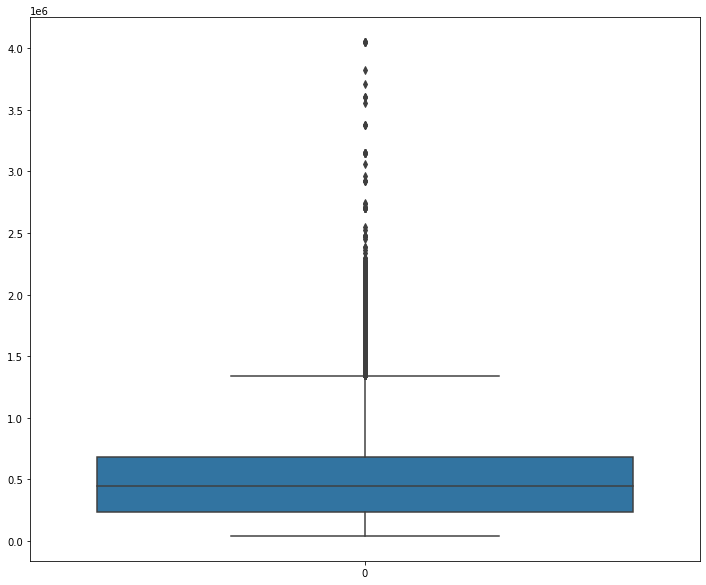

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(df_a['AMT_GOODS_PRICE'])
plt.show()

In [30]:
# identify maximum frequency values
print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',df_a['NAME_TYPE_SUITE'].mode()[0])
print('OBS_30_CNT_SOCIAL_CIRCLE:', df_a['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', df_a['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', df_a['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', df_a['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


In [31]:
# For Code Gender column

print('CODE_GENDER: ',df_a['CODE_GENDER'].unique())
print('No of values: ',df_a[df_a['CODE_GENDER']=='XNA'].shape[0])

XNA_count = df_a[df_a['CODE_GENDER']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(df_a.index)*100,3)

print('% of XNA Values:',  per_XNA)

print('maximum frequency data :', df_a['CODE_GENDER'].describe().top)

CODE_GENDER:  ['M' 'F' 'XNA']
No of values:  4
% of XNA Values: 0.001
maximum frequency data : F


In [32]:
# Dropping the XNA value in column 'CODE_GENDER' with "F" for the dataset

df_a = df_a.drop(df_a.loc[df_a['CODE_GENDER']=='XNA'].index)
df_a[df_a['CODE_GENDER']=='XNA'].shape

(0, 37)

In [33]:
# For Organization column
print('No of XNA values: ', df_a[df_a['ORGANIZATION_TYPE']=='XNA'].shape[0])

XNA_count = df_a[df_a['ORGANIZATION_TYPE']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(df_a.index)*100,3)

print('% of XNA Values:',  per_XNA)

df_a['ORGANIZATION_TYPE'].describe()

No of XNA values:  55374
% of XNA Values: 18.007


count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [34]:
# # Dropping the rows have 'XNA' values in the organization type column

df_a = df_a.drop(df_a.loc[df_a['ORGANIZATION_TYPE']=='XNA'].index)
df_a[df_a['ORGANIZATION_TYPE']=='XNA'].shape

(0, 37)

In [35]:
# Casting variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                'DAYS_LAST_PHONE_CHANGE']

df_a[numeric_columns]=df_a[numeric_columns].apply(pd.to_numeric)
df_a.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0


In [36]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252133 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252133 non-null  int64  
 1   TARGET                       252133 non-null  int64  
 2   NAME_CONTRACT_TYPE           252133 non-null  object 
 3   CODE_GENDER                  252133 non-null  object 
 4   FLAG_OWN_CAR                 252133 non-null  object 
 5   FLAG_OWN_REALTY              252133 non-null  object 
 6   CNT_CHILDREN                 252133 non-null  int64  
 7   AMT_INCOME_TOTAL             252133 non-null  float64
 8   AMT_CREDIT                   252133 non-null  float64
 9   AMT_ANNUITY                  252121 non-null  float64
 10  AMT_GOODS_PRICE              251877 non-null  float64
 11  NAME_TYPE_SUITE              251037 non-null  object 
 12  NAME_INCOME_TYPE             252133 non-null  object 
 13 

In [37]:
# describe numeric columns
df_a[numeric_columns].describe()


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE
count,252133.000000,252133.000000,2.521330e+05,2.521330e+05,252121.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252132.000000
mean,0.086601,0.498511,1.759139e+05,6.114018e+05,27812.449610,0.020894,14769.152336,2384.142254,4635.438761,2800.635795,12.203274,-971.040867
std,0.281250,0.763159,2.588536e+05,4.065294e+05,14647.829516,0.013874,3662.562670,2338.327666,3252.161488,1515.365456,3.299804,827.308950
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,11775.000000,767.000000,1845.000000,1487.000000,10.000000,-1578.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,14573.000000,1648.000000,4265.000000,2886.000000,12.000000,-763.000000
75%,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,17563.000000,3175.000000,6952.000000,4177.000000,15.000000,-288.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,25200.000000,17912.000000,22928.000000,7197.000000,23.000000,0.000000


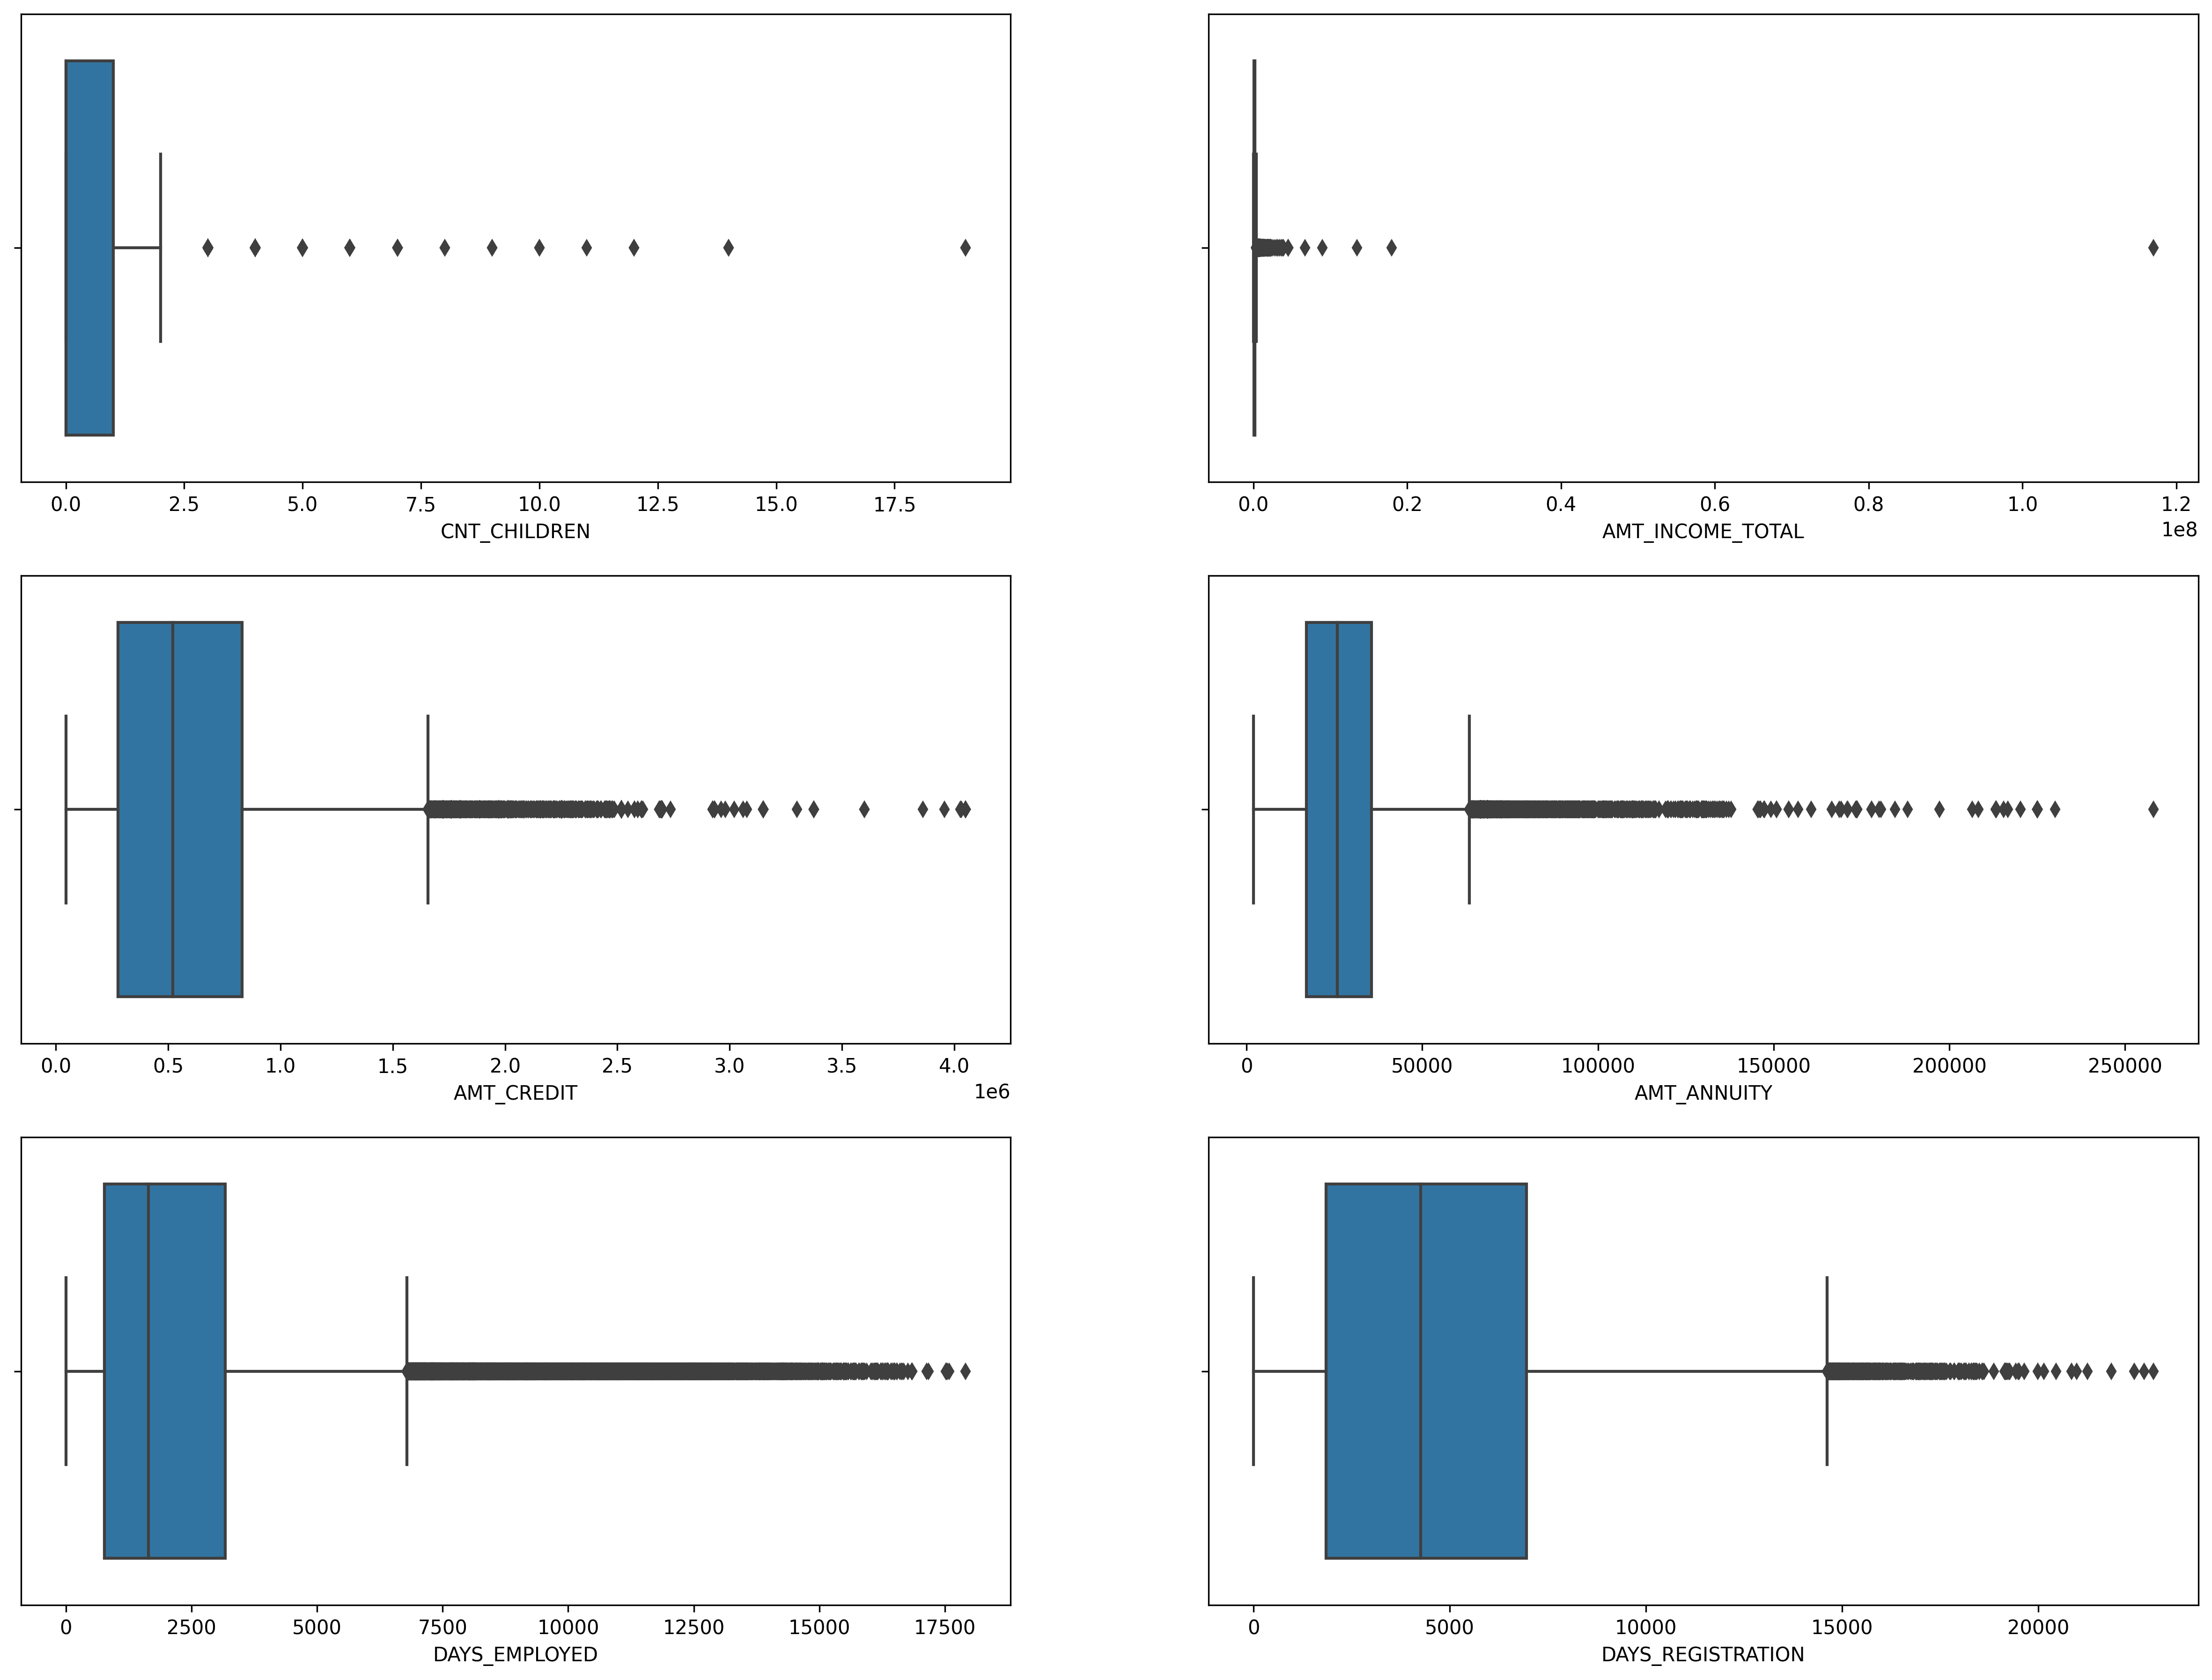

In [38]:
# Box plot for selected columns
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df_a)
plt.show()

From the above box plot and descibe analysis we found that following are the numeric columns are having outliers:

~
CNT_CHILDREN, AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED, DAYS_REGISTRATION